In [3]:
d = []
d.append((1,2,3))
d.append((4,5,6))
d.append((7,8,9))

import pandas as pd
dfr = pd.DataFrame(d)
dfr.columns = ["a","b","c"]
dfr


,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [7]:
file = "../tests/train_stats_context_n.pkl"
import pickle
import matplotlib.pyplot as plt
train_stats = pickle.load(open(file, "rb"))

In [9]:
train_stats

{'mean': array([ 4.17992979e-02,  7.97950632e-01,  9.07712563e-01, -4.69629115e-02,
        -3.82701660e-03, -8.74449755e-03, -7.92970883e-01,  3.71112710e-01,
         3.54993620e-01,  7.82264263e-01,  1.30419027e-01,  1.32558845e-01,
         5.26132288e-01,  6.50779622e-01, -6.54752882e-01,  5.24407730e-01,
        -9.78160305e-04, -2.42240658e-02,  1.49134352e-01, -9.42235391e-01,
         9.55514044e-01,  1.55381565e-01,  8.60475349e-03, -8.57733679e-02,
         9.30707987e-01, -3.65763094e-01,  3.65763093e-01,  9.30707988e-01,
        -5.39638067e-05, -2.20950705e-10, -8.03759350e-01,  3.66950645e-01,
         3.59746666e-01,  7.99648846e-01, -1.07608940e-01, -9.39447865e-02,
         5.23129421e-01,  6.57871881e-01, -6.62221889e-01,  5.19910154e-01,
         9.89254835e-03,  7.55579194e-02,  1.12197020e-01, -9.42710888e-01,
         9.58300668e-01,  1.14736724e-01,  2.29248790e-02,  1.20145031e-01,
         9.30707949e-01, -3.65763189e-01,  3.65763188e-01,  9.30707951e-01,
    

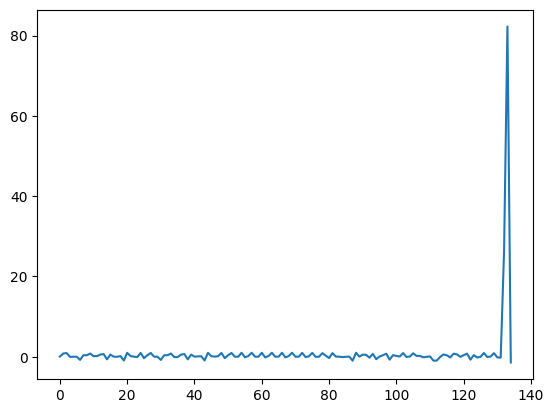

In [8]:
plt.plot(train_stats["mean"])

In [9]:
import re
import pandas as pd

# Function to extract training stats
def extract_training_stats(log_file):
    # Define a pattern to match lines with training stats
    pattern = r"Epoch: (\d+), Iteration: (\d+), lr: ([\d.e-]+), loss: ([\d.e-]+), r: ([\d.e-]+), p: ([\d.e-]+), smooth: ([\d.e-]+)"
    
    # Initialize a list to store the stats
    stats = []
    
    # Read the log file
    with open(log_file, 'r') as f:
        for line in f:
            match = re.search(pattern, line)
            if match:
                # Extract matched groups
                epoch, iteration, lr, loss, r, p, smooth = match.groups()
                # Append as a dictionary
                stats.append({
                    'Epoch': int(epoch),
                    'Iteration': int(iteration),
                    'Learning Rate': float(lr),
                    'Loss': float(loss),
                    'R': float(r),
                    'P': float(p),
                    'Smooth': float(smooth),
                })
    
    # Convert to Pandas DataFrame
    df = pd.DataFrame(stats)
    return df

# Path to the log file

# Extract training stats
training_stats_df = extract_training_stats("../experiments/logs/slurm-13709407.out")
training_stats_df2 = extract_training_stats("../experiments/logs/slurm-13766177.out")


#concat the two dataframes
training_stats_df = pd.concat([training_stats_df, training_stats_df2])
# plot each stat
for k in 




      Epoch  Iteration  Learning Rate      Loss         R          P    Smooth
0         1        100       0.000009  0.349365  0.139470  19.492431  2.994144
1         1        200       0.000017  0.309149  0.132168  16.426582  2.542963
2         1        300       0.000026  0.311958  0.131061  16.845995  2.487396
3         1        400       0.000035  0.301695  0.130089  15.867129  2.586862
4         1        500       0.000044  0.283200  0.121174  15.056955  2.291346
...     ...        ...            ...       ...       ...        ...       ...
2623     21     262400       0.000122  0.030462  0.016001   0.717513  1.457142
2624     21     262500       0.000122  0.031619  0.016731   0.752250  1.473164
2625     21     262600       0.000122  0.031571  0.016544   0.747052  1.511224
2626     21     262700       0.000122  0.031088  0.016234   0.739209  1.492348
2627     21     262800       0.000122  0.031120  0.016275   0.726881  1.515110

[2628 rows x 7 columns]
     Epoch  Iteration  Lear